# [Feature Scaling — Effect Of Different Scikit-Learn Scalers: Deep Dive](https://towardsdatascience.com/feature-scaling-effect-of-different-scikit-learn-scalers-deep-dive-8dec775d4946)

Feature scaling is a vital element of data preprocessing for machine learning. Implementing the right scaler is equally important for precise foresight with machine learning algorithms.

In supervised machine learning, we calculate the value of the output variable by supplying input variable values to an algorithm. Machine learning algorithm relates the input and output variable with a mathematical function.

```
Output variable value = (2.4* Input Variable 1 )+ (6*Input Variable 2) + 3.5
```

There are a few specific assumptions behind each of the machine learning algorithms. To build an accurate model, we need to ensure that the input data meets those assumptions. In case, the data fed to machine learning algorithms do not satisfy the assumptions then prediction accuracy of the model is compromised.


Most of the supervised algorithms in sklearn require standard normally distributed input data centred around zero and have variance in the same order. If the value range from 1 to 10 for an input variable and 4000 to 700,000 for the other variable then the second input variable values will dominate and the algorithm will not be able to learn from other features correctly as expected.


In this article, I will illustrate the effect of scaling the input variables with different scalers in scikit-learn and three different regression algorithms.


----


## 0. Preparation

In the below code, we import the packages we will be using for the analysis. We will create the test data with the help of make_regression

In [11]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import *
from sklearn.linear_model import *

We will use the sample size of 100 records with three independent (input) variables. Further, we will inject three outliers using the method “np.random.normal”

In [2]:
X, y, coef = make_regression(n_samples=100, n_features=3,noise=2,tail_strength=0.5,coef=True, random_state=0)
X[:3] = 1 + 0.9 * np.random.normal(size=(3,3))
y[:3] = 1 + 2 * np.random.normal(size=3)

We will print the real coefficients of the sample datasets as a reference and compare with predicted coefficients.

In [6]:
print('The real coefficients are:')
print(coef)

The real coefficients are:
[39.84342586  6.2712952  62.88984391]


We will train the algorithm with 80 records and reserve the remaining 20 samples unseen by the algorithm earlier for testing the accuracy of the model.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

We will study the scaling effect with the scikit-learn StandardScaler, MinMaxScaler, power transformers, RobustScaler and, MaxAbsScaler.

In [8]:
regressors=[StandardScaler(),MinMaxScaler(),
PowerTransformer(method='yeo-johnson'),
RobustScaler(quantile_range=(25,75)),MaxAbsScaler()]

All the regression model we will be using is mentioned in a list object.

In [9]:
models=[Ridge(alpha=1.0),HuberRegressor(),LinearRegression()]

In the code below, we scale the training and test sample input variable by calling each scaler in succession from the regressor list defined earlier. We will draw a scatter plot of the original first input variable and scaled the first input variable to get an insight on various scaling. We see each of these plots little later in this article.


Further, we fit each of the models with scaled input variables from different scalers and predict the values of dependent variables for test sample dataset.

In [ ]:
#plt.title?

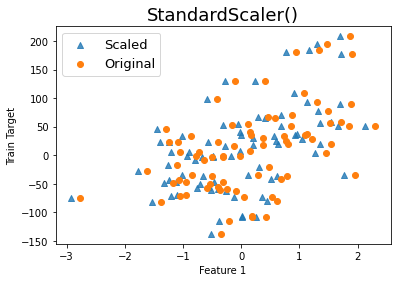

The calculated coeffiects with  Ridge() and StandardScaler() [36.73143644  3.06524694 58.9046557 ]
The calculated coeffiects with  HuberRegressor() and StandardScaler() [40.17228987  6.49228617 64.19870288]
The calculated coeffiects with  LinearRegression() and StandardScaler() [37.17529825  3.04649618 59.63395406]


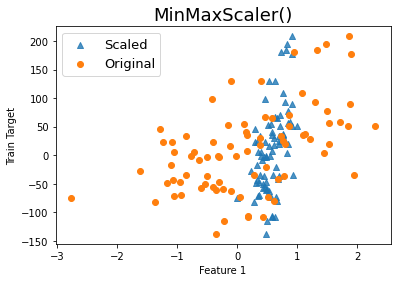

The calculated coeffiects with  Ridge() and MinMaxScaler() [143.22574596  14.25918823 209.86616421]
The calculated coeffiects with  HuberRegressor() and MinMaxScaler() [202.90908067  30.83020039 278.05745637]
The calculated coeffiects with  LinearRegression() and MinMaxScaler() [187.78426019  14.46988408 258.29780679]


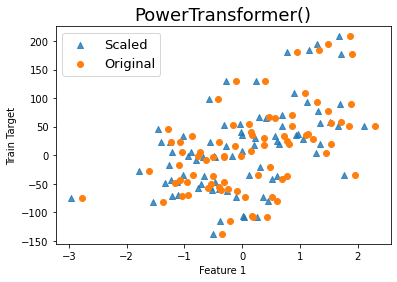

The calculated coeffiects with  Ridge() and PowerTransformer() [37.01891474  3.16494181 59.00816153]
The calculated coeffiects with  HuberRegressor() and PowerTransformer() [40.36808571  6.57057277 64.32220945]
The calculated coeffiects with  LinearRegression() and PowerTransformer() [37.47114683  3.15026114 59.74098543]


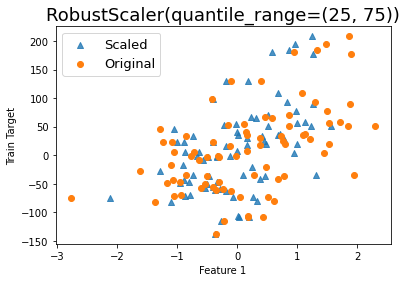

The calculated coeffiects with  Ridge() and RobustScaler(quantile_range=(25, 75)) [49.81099998  4.19690935 65.68857696]
The calculated coeffiects with  HuberRegressor() and RobustScaler(quantile_range=(25, 75)) [55.06463329  8.98068402 71.80078411]
The calculated coeffiects with  LinearRegression() and RobustScaler(quantile_range=(25, 75)) [50.95675308  4.21420646 66.69553892]


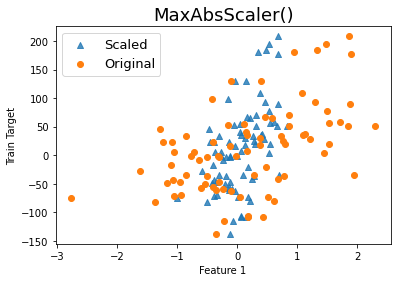

The calculated coeffiects with  Ridge() and MaxAbsScaler() [ 93.8382322    7.71014771 129.66592481]
The calculated coeffiects with  HuberRegressor() and MaxAbsScaler() [110.82664959  16.3582046  148.81055642]
The calculated coeffiects with  LinearRegression() and MaxAbsScaler() [102.56048655   7.67646991 138.23110852]


In [20]:
for regressor in regressors:
    X_train_scaled=regressor.fit_transform(X_train)
    X_test_scaled=regressor.transform(X_test)
    Scaled =plt.scatter(X_train_scaled[:,0],y_train, marker='^', alpha=0.8)
    Original=plt.scatter(X_train[:,0],y_train)
    plt.legend((Scaled, Original),('Scaled', 'Original'),loc='best',fontsize=13)
    plt.title(label=regressor, fontdict={'fontsize': 18})
    plt.xlabel("Feature 1")
    plt.ylabel("Train Target")         
    plt.show()
    for model in models:
        reg_lin=model.fit(X_train_scaled, y_train)
        y_pred=reg_lin.predict(X_test_scaled)   
        print("The calculated coeffiects with ", model , "and", regressor, reg_lin.coef_)

Finally, the predicted coefficients from the model fit are printed for the comparison with real coefficients.

On first glance itself, we can deduce that same regression estimator predicts different values of the coefficients based on the scalers.

Predicted coefficients with MaxAbsScaler and MinMax scaler is quite far from true coefficient values.
We can see the importance of appropriate scalers in the prediction accuracy of the model from this example.

```
As a self-exploration and learning exercise, I will encourage you all to calculate the R2 score 
and Root Mean Square Error (RMSE) for each of the training and testing set combination 
and compare it with each other.
```

---

Now that we understand the importance of scaling and selecting suitable scalers, we will get into the inner working of each scaler.


*Standard Scaler*: It is one of the popular scalers used in various real-life machine learning projects. The mean value and standard deviation of each input variable sample set are determined separately. It then subtracts the mean from each data point and divides by the standard deviation to transforms the variables to zero mean and standard deviation of one. It does not bound the values to a specific range, and it can be an issue for a few algorithms.


*MinMax Scaler*: All the numeric values scaled between 0 and 1 with a MinMax Scaler

Xscaled= (X-Xmin)/(Xmax-Xmin)

MinMax scaling is quite affected by the outliers. If we have one or more extreme outlier in our data set, then the min-max scaler will place the normal values quite closely to accommodate the outliers within the 0 and 1 range. We saw earlier that the predicted coefficients with MinMax scaler are approximately three times the real coefficient. I will recommend not to use MinMax Scaler with outlier dataset.


*Robust Scaler*: Robust scaler is one of the best-suited scalers for outlier data sets. It scales the data according to the interquartile range. The interquartile range is the middle range where most of the data points exist.


*Power Transformer Scaler*: Power transformer tries to scale the data like Gaussian. It attempts optimal scaling to stabilize variance and minimize skewness through maximum likelihood estimation. Sometimes, Power transformer fails to scale Gaussian-like results hence it is important to check the plot the scaled data.

*MaxAbs Scaler*: MaxAbsScaler is best suited to scale the sparse data. It scales each feature by dividing it with the largest maximum value in each feature.


For example, if an input variable has the original value [2,-1,0,1] then *MaxAbs* will scale it as [1,-0.5,0,0.5]. It divided each value with the highest value i.e. 2. It is not advised to use with large outlier dataset.

We have learnt that scaling the input variables with suitable scaler is as vital as selecting the right machine learning algorithm. Few of the scalers are quite sensitive to outlier dataset, and others are robust. Each of the scalers in Scikit-Learn has its strengths and limitations, and we need to be mindful of it while using it.

It also highlights the importance of performing the exploratory data analysis (EDA) initially to identify the presence or absence of outliers and other idiosyncrasies which will guide the selection of appropriate scaler.

In my article, [5 Advanced Visualisation for Exploratory data analysis (EDA)](https://towardsdatascience.com/5-advanced-visualisation-for-exploratory-data-analysis-eda-c8eafeb0b8cb) you can learn more about this area.

In case, you would like to learn a structured approach to identify the appropriate independent variables to make accurate predictions then read my article [“How to identify the right independent variables for Machine Learning Supervised."](https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32)